# Exercise Sheet No. 5

---

> Machine Learning for Natural Sciences, Summer 2021, Jun.-Prof. Pascal Friederich, pascal.friederich@kit.edu
> 
> Deadline: 17.05.2021, 8 am
> 
> Tutor: patrick.reiser@kit.edu  
> **Please ask questions in the forum and only contact the Tutor when there are issues with the grading**

---

**Topic**: This exercise sheet will focus on Bayesian statistics, k-nearest neighbors and monte-carlo simulation.

# 5 Bayes' theorem

Here are Bayes rule and some important formulas of lecture 2.

$$\boxed{p(y|x) = \frac{p(x|y) p(y)}{p(x)} }$$

where $p(y|x)$ is the posterior, $p(x|y)$ the likelihood, $p(x)$ the evidence and $p(y)$ the prior. Here, $p(x\mid y)$ is a conditional probability, which gives the probability of event $x$ occurring given that $y$ is true. Marginalization over a variable e.g. $y$ ("eliminate variable $y$") is defined by:

$$p(x) = \sum\limits_k p(x|y{=}k) \; p(y{=}k)$$

Where k is each possible realization of y.

Let us consider the following toy problem for the Naive Bayes classifier. The feature variable $X \in [0, 1]$ is real-valued and 1-dimensional, and the response of the system $Y \in \{0, 1\}$ is discrete with two classes $0$ and $1$. For the system only the prior probabilities and likelihoods (as density functions f) are known. They are given by

$$p(y = 0) = p(y = 1) = \frac{1}{2}$$

$$p(x\,|\,y = 0) =  2 - 2x$$

$$p(x\,|\,y = 1) = 2x$$

Now, calculate the probability density of $x$, i.e., $p(x)$ by marginalization over $y$. 

Hint: Marginalization with discrete variables is defined by $p(x) = \sum_y p(x|y) p(y)$

In [1]:
p_of_x = None
# YOUR CODE HERE
p_of_x = 1

In [2]:
# (1 Point)
assert p_of_x or p_of_x == 0, 'Please assign a value to p_of_x!'
# Additional test for p(x)

Calculate the true posteriors $p^*(y|x)$ by using Bayes rule. Since $y$ is a discrete variable it is again enough to calculate the classes $\{0,1\}$ separatly 

$$p^*(y=0\,|\,x) = \frac{p(x\,|\,y = 0)\,p(y = 0)}{p(x)}$$
$$p^*(y=1\,|\,x) = \frac{p(x\,|\,y = 1)\,p(y = 1)}{p(x)}$$

The Naive Bayesian classifier would then be: "pick the highest probability class for given $x$". 

$$\hat{f}(x) = \underset{k}{\text{argmax}} \; p^*(y=k|x)$$

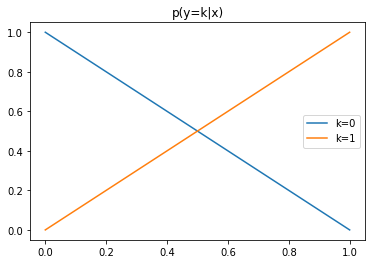

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Give your solution as a function and plot it
def prob_y_x(y,x): # p(y|x)
    prob_density = None
    # YOUR CODE HERE
    if y == 0: prob_density = 1 - x
    elif y == 1: prob_density = x
    else: raise Exception("disallowed value for y given")
    return prob_density
# plot the probability y|x (ordinate) against x (abscissa) for y=0 and y=1
# YOUR CODE HERE
x = np.linspace(0, 1, num=5)

for k in range(0, 2):
    p_of_x = [prob_y_x(k, x_i) for x_i in x]
    plt.plot(x, p_of_x, label=f"k={k}")

plt.legend()
plt.title("p(y=k|x)")
plt.show()

In [4]:
# (2 Points)
assert np.abs(prob_y_x(0,0.0) - 1.0 ) < 0.001
# Additional test for p (y|x) with y=0 or y=1

### 5.1 Bayes error rate

The Bayes error rate can be described by the probability of failure of the Bayes classifer $\mathbb{E}[ p(\hat{y} {\ne} y^* |x)]$, where $\mathbb{E}$ denotes the expectation value, defined by $\mathbb{E}[X] = \int x \; p(x) \; dx$. The probability of error can also be defined by $p(\text{error}) = 1- p(\text{success}) = 1 - \mathbb{E}_{x\sim p(x)}[p(\hat{y}_i=y_i^*|x)]$, which gives:

$$\mathbb{E}[p(\hat{y} {\ne} y^* |x)] = \int (1- \underset{k}{\text{argmax}}\; p^*(y{=}k|x)) \;  p(x) \, dx$$

Determine the error rate for the toy problem, i.e. the best achievable error for Bayes classifer, using the above formular. In this case this is equal to a threshold classifier that picks either $y \in \{0,1\}$ depending whether $x$ is smaller or bigger than a threshold $x_t = 1/2$. 

Bonus: If you want you can prove that $x_t = 1/2$ is the best choice of a threshold (not graded).

In [5]:
error_bayes = None # error rate not in % but [0,1]
# YOUR CODE HERE
error_bayes = 1/4

In [6]:
# (2 Points)
# The derivation is not graded, only the answer yields 2 Points
assert isinstance(error_bayes, float) 

### 5.2 Nearest Neighbour error rate

The nearest-neighbor classiffier's asymptotic local error ($N \to \infty$) is given by the Gini impurity for 1-NN and based on Bayes classification (without proof):

$$ p_\infty(\text{error}|x) = 1-\sum_k p(y=k|x)^2$$

And for the asymptotic overall error

$$ P_\infty(\text{error}) = \int p_{\infty}(\text{error}\,|\,x)\,p(x)\,dx =\int \left(1-\sum_k p(y=k|x)^2 \right) \,p(x)\,dx$$

Determine the error rate for the toy problem, i.e. the best achievable error for Nearest Neighbour classifer, using the above formular.

In [7]:
error_NN = None  # error rate not in % but [0,1]
# YOUR CODE HERE
error_NN = 1/3

In [8]:
# (2 Points)
# The derivation is not graded, only the answer yields 2 Points
assert isinstance(error_NN, float)

### 5.3 Error rate for constant classifier

At last, determine the error rate for our toy problem for a classifier that knows nothing about $x$, or more specifically the randomly guesses $y$ or always picks for example $y=1$ .

In [9]:
error_guess = None # error rate not in % but [0,1]
# YOUR CODE HERE
error_guess = 1/2

In [10]:
# (1 Point)
# The derivation is not graded, only the answer yields 1 Point
assert isinstance(error_guess, float)

# 5.4 Monte-Carlo

To test the above theoretically derived error rates, we can use a random number generator to produce data. Specifically, one first samples an instance label $Y$ according to the prior probabilities, and then uses the
corresponding likelihood to sample the feature $X$. If no predefined random generator for the desired
likelihood is available (as is the case here), uniformly distributed samples from a standard random
number generator can be transformed to the desired distribution by means of "inverse transform
sampling" (see https://en.wikipedia.org/wiki/Inverse_transform_sampling). You do not have to do this here (we give the solution below), however, you are encouraged to read about it.

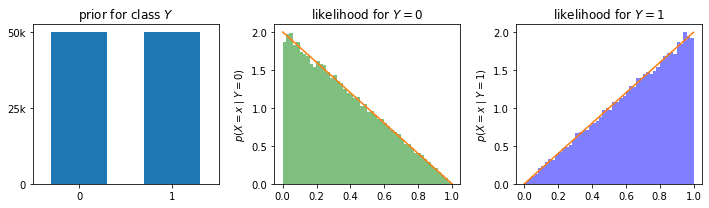

In [11]:
# Make data
def create_data(N,seed=0):
    np.random.seed(seed)
    data = np.zeros((N, 2), dtype = np.float32)
    for i in range(N):
        # sample y uniformly between 0 and 1
        y = np.random.randint(2)
        # use inverse transform sampling for x, given y
        u = np.random.rand()
        if 0 == y:
            x = 1 - np.sqrt(1 - u)
        else:
            x = np.sqrt(u)
        data[i,:] = (x,y)
    return data

# Generate Data
test_data = create_data(100000)
X_0 = test_data[test_data[:,1] == 0][:,0]
X_1 = test_data[test_data[:,1] == 1][:,0]

# show prior and likelihoods for both classes as bar chart and histograms
fig = plt.figure(figsize = (10, 3))

plt.subplot(131)
plt.title(r'prior for class $Y$')
plt.bar([0, 1], [X_0.size, X_1.size], width = 0.6)
plt.xticks([0,1]); plt.xlim([-0.5, 1.5]); plt.yticks([0,25000,50000], ['0', '25k', '50k'])

plt.subplot(132)
plt.title(r'likelihood for $Y = 0$')
plt.hist(X_0, 50, density = True, facecolor = 'green', alpha = 0.5)
plt.ylabel(r'$p(X = x \mid Y = 0)$')
plt.plot([0,1], [2,0])

plt.subplot(133)
plt.title(r'likelihood for $Y = 1$')
plt.hist(X_1, 50, density = True, facecolor = 'blue', alpha = 0.5)
plt.ylabel(r'$p(X = x \mid Y = 1)$')
plt.plot([0,1], [0,2])

fig.tight_layout(); plt.show()

### 5.5 Classifier Error rates

Now determine "experimentally" the error rates for the following classifiers using the random number generation of `create_data()` for the toy problem:

* A) Threshold classifier with threshold $x_t$ (for $x_t = 1/2$ this equals Naive Bayes classifier):

$$ f_A (x) =  \begin{cases}
	0 &\text{if} \;\;x < x_t \\
	1 & \text{if} \;\;x \geqslant x_t
	\end{cases}$$
  

* B) Constant classifier:

$$ f_B(x) = 1$$

* C) Random classifier:

$$ f_C(x) =  \begin{cases}
	0 & \; \text{with probability} 1/2\\
	1 &  \;\text{otherwise}
	\end{cases}$$
    
* D) Nearest Neighbour classifier (k=1) for a training set $(x_i, y_i) \in TS$ that is taken from the data above.

$$ \hat{y} = f_D(x;\text{TS}) = y_{\hat{i}}^*$$

$$\hat{i} = \underset{i}{\text{argmin}}\; d(x_i,x)$$


In [12]:
# simple classifiers
# implement the classifiers' functions below:
def pred_A(x,xt):
    pass
def pred_B(x):
    pass
def pred_C(x):
    pass

# YOUR CODE HERE
def pred_A(x,xt):
    return np.where(x < xt, 0, 1)
def pred_B(x):
    return np.ones(x.shape)
def pred_C(x):
    return np.random.randint(2, size=x.shape)

# Determine the error rates
def ErrorCount(y_pred, y_true):
    CountError = np.array(np.rint(y_true), dtype=np.int) != np.array(np.rint(y_pred),dtype=np.int)
    CountError = np.sum(CountError)
    return CountError/len(y_true)

# Now determine the error rates with std deviation, i.e. create_data(N=100000) for 5 repetitions
# For A choose here xt = 0.5
dat_mult = [create_data(N=100000,seed=i) for i in range(5)]
error_A = None
error_A_std = None
error_B = None
error_B_std = None
error_C = None
error_C_std = None

# YOUR CODE HERE
def calc_error(x, y_true, pred, *pred_args):
    y_pred = pred(x, *pred_args)
    return ErrorCount(y_pred, y_true)

errors_A, errors_B, errors_C = [np.zeros(5) for i in range(0, 3)]

for i, dat in enumerate(dat_mult):
    errors_A[i] = ErrorCount(pred_A(dat[:, 0], 0.5), dat[:, 1])
    errors_B[i] = ErrorCount(pred_B(dat[:, 0]), dat[:, 1])
    errors_C[i] = ErrorCount(pred_C(dat[:, 0]), dat[:, 1])

error_A_std = np.std(errors_A)
error_B_std = np.std(errors_B)
error_C_std = np.std(errors_C)

error_A = np.mean(errors_A)
error_B = np.mean(errors_B)
error_C = np.mean(errors_C)

<ipython-input-12-62e50f2d6d80>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CountError = np.array(np.rint(y_true), dtype=np.int) != np.array(np.rint(y_pred),dtype=np.int)


In [13]:
# YOUR CODE HERE
print("What to do here??")
print("Maybe this:")
print(f"Error A: {error_A} +- {'%.6f' % error_A_std}")
print(f"Error B: {error_B} +- {'%.6f' % error_B_std}")
print(f"Error C: {error_C} +- {'%.6f' % error_C_std}")

What to do here??
Maybe this:
Error A: 0.251052 +- 0.001408
Error B: 0.500178 +- 0.000592
Error C: 0.500318 +- 0.003168


In [14]:
# (1 Points)
# Try to assign a single value to the error rates
# We will also check the function implementations
assert error_A is not None

In [15]:
# (1 Points)
assert error_B is not None

In [16]:
# (1 Points)
assert error_C is not None

In [17]:
# Now we have to implement the NN classifier
# Tipp: Use the distance function from exercise sheet 3! Or scipy cdist.
from scipy.spatial.distance import cdist

def nn_classifier(x_test, TS):
    """Nearest neighbor classifier for arbitrary training-set size.
    Use vectorization (ideally).
    
    Args:
        x_test (np.array): data to predict of shape (N,1)
        TS (np.array): Training dataset of shape (N,2) with (x,y) in the last dimension.
    
    Returns:
        y_pred (np.array): Prediction of the NN classifier of shape (N,1) with dtype=np.int
    """  
    pass

    # YOUR CODE HERE
    dists = cdist(x_test, TS[:, [0]])
    y_pred = TS[dists.argmin(axis=1), 1]
    return y_pred

    
dat_mult = [create_data(N=100000,seed=i) for i in range(5)] # For training
test_mult = [create_data(N=100,seed=i+100) for i in range(5)] # For testing
error_NN = None
error_NN_std = None

# YOUR CODE HERE
errors_NN = np.zeros(5)
for i, (dat, test) in enumerate(zip(dat_mult, test_mult)):
    errors_NN[i] = ErrorCount(nn_classifier(test[:, [0]], dat), test[:, 1])

error_NN_std = np.std(errors_NN)
error_NN = np.mean(errors_NN)

<ipython-input-12-62e50f2d6d80>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CountError = np.array(np.rint(y_true), dtype=np.int) != np.array(np.rint(y_pred),dtype=np.int)


In [18]:
# YOUR CODE HERE
print(f"Error NN: {error_NN} +- {'%.6f' % error_NN_std}")

Error NN: 0.346 +- 0.034409


In [19]:
# (2 Points)
# We will also test the function nn_classifier(x_test,TS)
assert error_NN is not None
assert error_NN_std is not None

In [20]:
# (1 Points)
assert nn_classifier(np.array([[0.0]]), np.array([[0.0,0.0]])) is not None

Evaluate the error rate as a function of the dataset size and plot it (not graded).

In [21]:
dat_grid = [[create_data(N=n,seed=i) for i in range(5)] for n in [50,100,1000,10000,100000]]
test_grid_nn = [[create_data(N=n,seed=i+100) for i in range(5)] for n in [5,10,100,100,1000]]

# Evaluate the error rate for the 4 rules as above and different size in dat_grid. 
# for nearest neighbour simply pick the separate test_grid_nn

# YOUR CODE HERE
import pandas as pd

dataset_sizes=[50,100,1000,10000,100000]
predictors = ["A", "B", "C", "NN"]

errors = pd.DataFrame(
    [np.zeros(len(predictors)) for i in range(0, len(dataset_sizes))], 
    columns=predictors, 
    index=dataset_sizes
)
stds = errors.copy()

for dataset_size, dat_list, test_list_nn in zip(dataset_sizes, dat_grid, test_grid_nn):

    error_reps = {pred: np.zeros(len(dat_list)) for pred in predictors}

    for i, (dat, test) in enumerate(zip(dat_list, test_list_nn)):
        error_reps["A"][i] = ErrorCount(pred_A(dat[:, 0], 0.5), dat[:, 1])
        error_reps["B"][i] = ErrorCount(pred_B(dat[:, 0]), dat[:, 1])
        error_reps["C"][i] = ErrorCount(pred_C(dat[:, 0]), dat[:, 1])
        error_reps["NN"][i] = ErrorCount(nn_classifier(test[:, [0]], dat), test[:, 1])
    
    for pred in predictors:
        stds.loc[dataset_size, pred] = np.std(error_reps[pred])
        errors.loc[dataset_size, pred] = np.mean(error_reps[pred])

<ipython-input-12-62e50f2d6d80>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CountError = np.array(np.rint(y_true), dtype=np.int) != np.array(np.rint(y_pred),dtype=np.int)


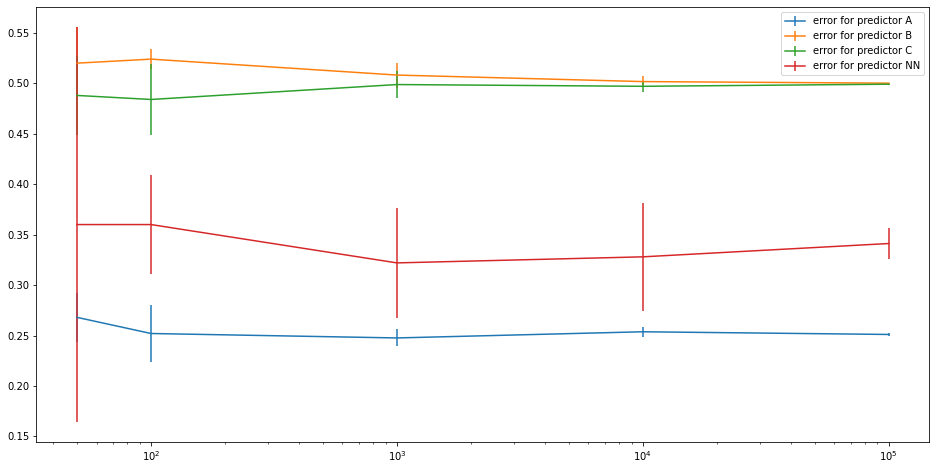

In [23]:
#Plot results
# YOUR CODE HERE
plt.subplots(figsize=(16, 8))

for pred in predictors:
    plt.errorbar(errors.index, errors[pred], yerr=stds[pred], label=f"error for predictor {pred}")

plt.xscale("log")
plt.legend()
plt.title = "error rate for A through D over dataset size"
plt.show()